In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('haberman.csv',header=None, names=['age','operational_year','exil_node','survival'])

In [3]:
df.head()

age  operational_year  exil_node  survival
0   30                64          1         1
1   30                62          3         1
2   30                65          0         1
3   31                59          2         1
4   31                65          4         1

## Six Questions


In [4]:
df.shape

(306, 4)

In [5]:
df.isnull().sum()

age                 0
operational_year    0
exil_node           0
survival            0
dtype: int64

In [6]:
df.duplicated().sum()

17

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 305
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               289 non-null    int64
 1   operational_year  289 non-null    int64
 2   exil_node         289 non-null    int64
 3   survival          289 non-null    int64
dtypes: int64(4)
memory usage: 11.3 KB


In [10]:
df.describe()

age  operational_year   exil_node    survival
count  289.000000        289.000000  289.000000  289.000000
mean    52.422145         62.906574    4.221453    1.273356
std     10.876915          3.275794    7.325239    0.446455
min     30.000000         58.000000    0.000000    1.000000
25%     44.000000         60.000000    0.000000    1.000000
50%     52.000000         63.000000    1.000000    1.000000
75%     60.000000         66.000000    5.000000    2.000000
max     83.000000         69.000000   52.000000    2.000000

## EDA

In [11]:
corr = df.corr()

<Axes: >

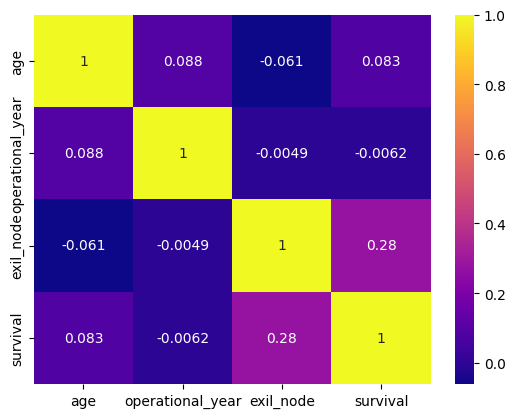

In [13]:
import seaborn as sns
sns.heatmap(corr,annot=True, cbar=True,cmap='plasma')

# Univariate analysis

## Histogram and Distribution plot


A histogram is a graphical representation of the distribution of a numerical dataset. Seaborn's displot() function can be used to draw histograms.


C:\Users\chokh\AppData\Local\Temp\ipykernel_17840\1164331168.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['operational_year'])
C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before op

<Axes: xlabel='operational_year', ylabel='Density'>

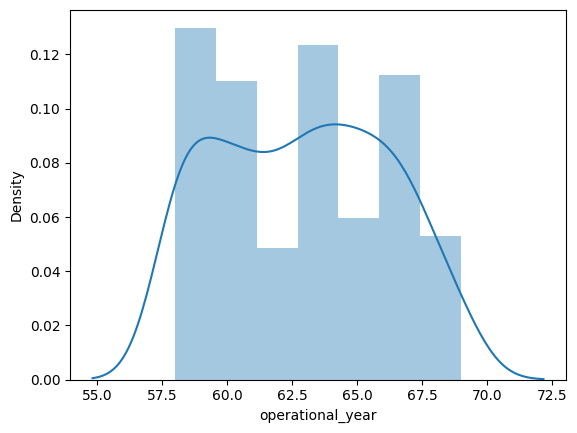

In [14]:
sns.distplot(df['operational_year'])

C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

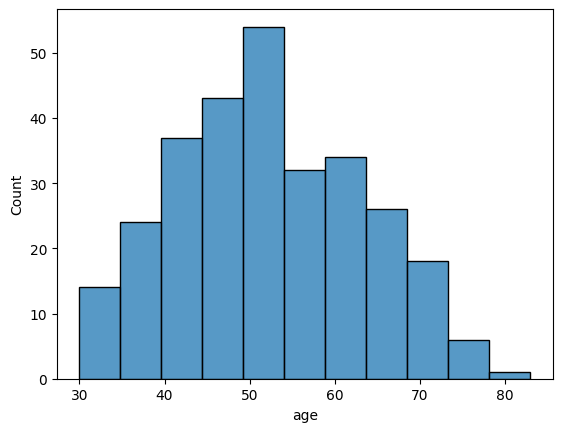

In [15]:
sns.histplot(df['age'])

## Relation

C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='age', ylabel='survival'>

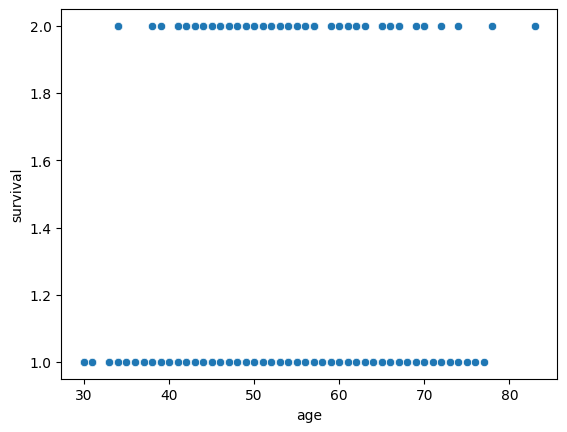

In [16]:
sns.scatterplot(x=df['age'],y=df['survival'])

## train test split


In [17]:
X = df.drop("survival",axis=1)
y = df['survival']

In [18]:
X.shape

(289, 3)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [21]:
X_train.shape

(231, 3)

In [22]:
X_test.shape

(58, 3)

In [23]:
y_train.shape

(231,)

In [24]:
y_test.shape

(58,)

## Standarization

In [25]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()

In [26]:
sclr.fit(X_train)
X_train = sclr.transform(X_train)
X_test = sclr.transform(X_test)

In [27]:
X_train

array([[-0.51822925, -1.49026827, -0.14363524],
       [ 1.7473074 ,  0.34411168, -0.54826623],
       [ 0.02549955, -0.87880829, -0.27851224],
       [-0.06512192, -0.2673483 , -0.54826623],
       [-0.51822925, -0.87880829, -0.00875825],
       [ 0.02549955, -0.87880829, -0.41338923],
       [ 0.84109274, -0.2673483 ,  0.26099575],
       [-0.97133658, -1.18453828, -0.27851224],
       [-1.9681727 ,  0.64984167, -0.00875825],
       [ 0.9317142 ,  0.03838169, -0.54826623],
       [ 0.56922834,  0.03838169, -0.54826623],
       [ 0.56922834,  0.34411168, -0.54826623],
       [ 0.75047127,  0.34411168, -0.54826623],
       [ 1.475443  ,  1.26130165,  0.53074974],
       [ 1.11295714, -1.18453828, -0.27851224],
       [-1.33382244, -1.18453828, -0.27851224],
       [ 1.56606446, -1.49026827, -0.00875825],
       [ 0.02549955, -0.87880829,  0.66562673],
       [-1.42444391, -1.49026827, -0.54826623],
       [-1.33382244,  0.95557166, -0.54826623],
       [-0.79009365,  0.03838169,  2.014

## Training models


In [28]:
df['survival'].value_counts()

survival
1    210
2     79
Name: count, dtype: int64

## Selecting model


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [30]:
models = {
    'lg':LogisticRegression(),
    'dtc':DecisionTreeClassifier(),
    'gnb':GaussianNB()
}


for name, mod in models.items():
    mod.fit(X_train,y_train)
    y_pred = mod.predict(X_test)
    
    print(f"{name} with accuracy : {accuracy_score(y_test,y_pred)}")

lg with accuracy : 0.7413793103448276
dtc with accuracy : 0.5344827586206896
gnb with accuracy : 0.7758620689655172


In [31]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.predict(X_test)

array([1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1], dtype=int64)

## Prediction system


In [32]:
def pred(age,oy,en):
    features = np.array([[age,oy,en]])
    features = sclr.fit_transform(features)
    pred = dtc.predict(features).reshape(1,-1)
    return pred[0]


age = 50
oy = 61
en = 2

res = pred(age,oy,en)

In [34]:
print(res)

[2]
